Here I show how to run a tsne comparison test.

In [1]:
import sys
sys.path.insert(0,"../")
import mview

In addition to running mpse-tsne on some set of distances, we may want to separately run tsne on each distance matrix/array and compare results. This can be done on a single line using the function mview.compare_tsne, using the same arguments as the function mview.mpse_tsne.

mview.TSNE():
  data details:
    number of samples : 300
  embedding details:
    embedding dimension : 2
    perplexity : 100.00
  TSNE.initialize():
    method : random
    initial cost : 2.32e+00
  TSNE.optimized():
    TSNE.gd():
      specs:
        gradient type : batch
        batch size : 15
      gd.single(): 
        computation parameters:
          stochastic : True
          constraint : False
          scheme : mm
          initial lr : 1.00e+02
          max_iter : 20
          max_step : 1.00e+10
        progress:
          iter:      cost:     grad:     lr:       step:
            20/  20  8.26e-01  1.46e-04  3.32e+01  4.85e-03
        results:
          conclusion : maximum number of iterations reached
          total iterations : 20
          final cost : 8.26e-01
          final gradient size : 1.46e-04
          final learning rate : 3.32e+01
          final step size : 4.85e-03
          time : 5.49e-01 [sec]
      final stress : 1.02e+00
    TSNE.gd():
      spe

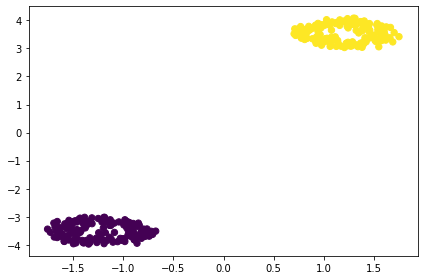

mview.TSNE():
  data details:
    number of samples : 300
  embedding details:
    embedding dimension : 2
    perplexity : 100.00
  TSNE.initialize():
    method : random
    initial cost : 2.31e+00
  TSNE.optimized():
    TSNE.gd():
      specs:
        gradient type : batch
        batch size : 15
      gd.single(): 
        computation parameters:
          stochastic : True
          constraint : False
          scheme : mm
          initial lr : 1.00e+02
          max_iter : 20
          max_step : 1.00e+10
        progress:
          iter:      cost:     grad:     lr:       step:
            20/  20  1.09e+00  1.69e-04  3.77e+01  6.36e-03
        results:
          conclusion : maximum number of iterations reached
          total iterations : 20
          final cost : 1.09e+00
          final gradient size : 1.69e-04
          final learning rate : 3.77e+01
          final step size : 6.36e-03
          time : 5.13e-01 [sec]
      final stress : 1.01e+00
    TSNE.gd():
      spe

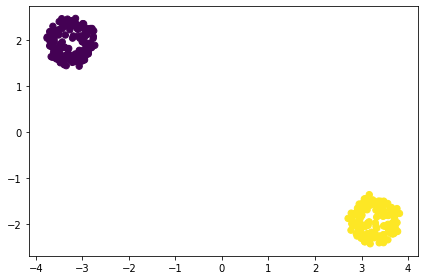

***mview.mpse_tsne()***
  mview.MPSE():
    data details:
      number of perspectives : 2
      number of samples : 300
    visualization details:
      embedding dimension : 3
      image dimension : 2
      visualization type : tsne
  setup visualization instance for perspective 1 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 100.00
        TSNE.initialize():
          method : random
          initial cost : 2.33e+00
  setup visualization instance for perspective 2 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 100.00
        TSNE.initialize():
          method : random
          initial cost : 2.32e+00
    initialize:
      fixed embedding : False
      initial embedding : random
      fixed projections : False
      initial projections : random
    MPSE

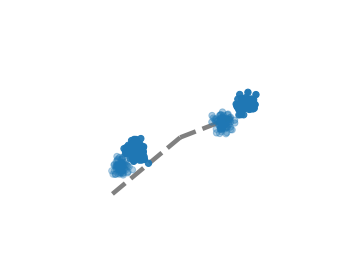

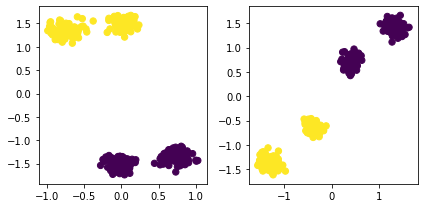

In [2]:
results = mview.compare_tsne('clusters', n_samples=300, n_clusters=2, n_perspectives=2, perplexity=100,
                            evaluate=True, estimate_cost=False, show_plots=True, verbose=2)

This will create an instance of mview.MPSE and solve the mpse-tsne problem, along witn n_perspectives number of mview.TSNE instances and solve the tsne problem (one for each perspective).

The result is a list, containing the MPSE and TSNE instances (first the MPSE instance, then the n_perspectives TSNE instances, for a list of size n_perspectives+1).

Both classes have similar attributes, so you can ask for embedding, cost, cost_history, separation.

In additional, MPSE has some attributes that do not apply to TSNE, such as projections, images, individual_cost, image_separation.

In [14]:
for ts in results[1::]:
    print('results for tsne w/ perspective i:')
    print('embedding shape',mv.embedding.shape)
    print('cost:',ts.cost)
    print('separation:',ts.separation) #this is the separation error
    print()
mv = results[0]
print('results for mpse-tsne:')
print('embedding shape:',mv.embedding.shape)
print('projection shape:',mv.projections.shape)
print('images shape:',mv.images.shape)
print('cost:',mv.cost)
print('individual costs:',mv.individual_cost)
print('separation:',mv.separation) #this will be None since the labels are different for each perspective
print('individual separation:',mv.image_separation) #this is the separation error for each perspective

results for tsne w/ perspective i:
embedding shape (300, 3)
cost: 0.7953703554414264
separation: 0.0

results for tsne w/ perspective i:
embedding shape (300, 3)
cost: 0.7939428936061299
separation: 0.0

results for mpse-tsne:
embedding shape: (300, 3)
projection shape: (2, 2, 3)
images shape: (2, 300, 2)
cost: 1.2083723847371572
individual costs: [1.08225375 1.32251823]
separation: None
individual separation: [0.0, 0.0]


The same experiments with more clusters and perspectives is below. TSNE will do just fine, but MPSE will not struggle to find an embedding that works for all clusters simultaneously.

mview.TSNE():
  data details:
    number of samples : 300
  embedding details:
    embedding dimension : 2
    perplexity : 100.00
  TSNE.initialize():
    method : random
    initial cost : 2.34e+00
  TSNE.optimized():
    TSNE.gd():
      specs:
        gradient type : batch
        batch size : 15
      gd.single(): 
        computation parameters:
          stochastic : True
          constraint : False
          scheme : mm
          initial lr : 1.00e+02
          max_iter : 20
          max_step : 1.00e+10
        progress:
          iter:      cost:     grad:     lr:       step:
            20/  20  7.43e-01  1.38e-04  3.61e+01  4.99e-03
        results:
          conclusion : maximum number of iterations reached
          total iterations : 20
          final cost : 7.43e-01
          final gradient size : 1.38e-04
          final learning rate : 3.61e+01
          final step size : 4.99e-03
          time : 5.07e-01 [sec]
      final stress : 1.05e+00
    TSNE.gd():
      spe

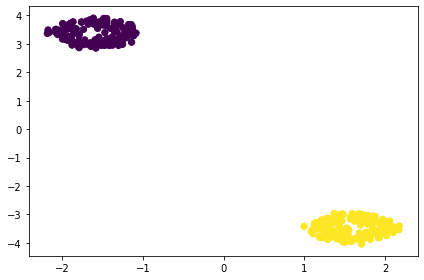

mview.TSNE():
  data details:
    number of samples : 300
  embedding details:
    embedding dimension : 2
    perplexity : 100.00
  TSNE.initialize():
    method : random
    initial cost : 2.32e+00
  TSNE.optimized():
    TSNE.gd():
      specs:
        gradient type : batch
        batch size : 15
      gd.single(): 
        computation parameters:
          stochastic : True
          constraint : False
          scheme : mm
          initial lr : 1.00e+02
          max_iter : 20
          max_step : 1.00e+10
        progress:
          iter:      cost:     grad:     lr:       step:
            20/  20  1.69e-01  3.95e-05  1.18e+02  4.67e-03
        results:
          conclusion : maximum number of iterations reached
          total iterations : 20
          final cost : 1.69e-01
          final gradient size : 3.95e-05
          final learning rate : 1.18e+02
          final step size : 4.67e-03
          time : 4.95e-01 [sec]
      final stress : 3.08e-01
    TSNE.gd():
      spe

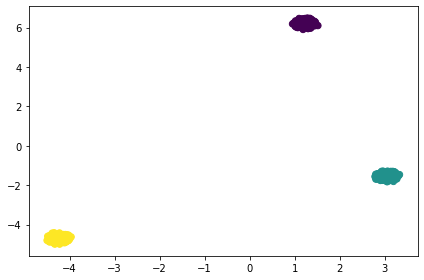

mview.TSNE():
  data details:
    number of samples : 300
  embedding details:
    embedding dimension : 2
    perplexity : 100.00
  TSNE.initialize():
    method : random
    initial cost : 2.33e+00
  TSNE.optimized():
    TSNE.gd():
      specs:
        gradient type : batch
        batch size : 15
      gd.single(): 
        computation parameters:
          stochastic : True
          constraint : False
          scheme : mm
          initial lr : 1.00e+02
          max_iter : 20
          max_step : 1.00e+10
        progress:
          iter:      cost:     grad:     lr:       step:
            20/  20  -2.44e-02  3.19e-05  7.67e+01  2.44e-03
        results:
          conclusion : maximum number of iterations reached
          total iterations : 20
          final cost : -2.44e-02
          final gradient size : 3.19e-05
          final learning rate : 7.67e+01
          final step size : 2.44e-03
          time : 4.71e-01 [sec]
      final stress : 1.38e-01
    TSNE.gd():
      s

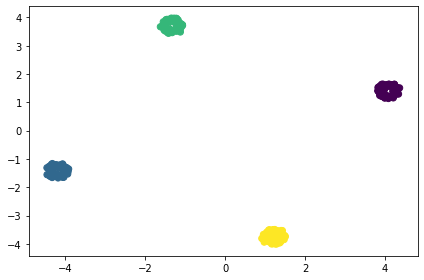

***mview.mpse_tsne()***
  mview.MPSE():
    data details:
      number of perspectives : 3
      number of samples : 300
    visualization details:
      embedding dimension : 3
      image dimension : 2
      visualization type : tsne
  setup visualization instance for perspective 1 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 100.00
        TSNE.initialize():
          method : random
          initial cost : 2.33e+00
  setup visualization instance for perspective 2 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:
          embedding dimension : 2
          perplexity : 100.00
        TSNE.initialize():
          method : random
          initial cost : 2.33e+00
  setup visualization instance for perspective 3 :
      mview.TSNE():
        data details:
          number of samples : 300
        embedding details:


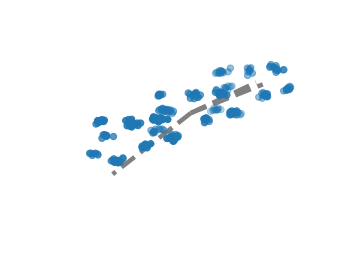

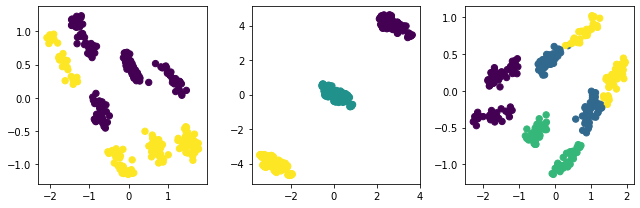

results for tsne w/ perspective i:
embedding shape (300, 3)
cost: 0.7928659906224553
separation: 0.0

results for tsne w/ perspective i:
embedding shape (300, 3)
cost: 0.12752320241085152
separation: 0.0

results for tsne w/ perspective i:
embedding shape (300, 3)
cost: 0.07493101392261521
separation: 0.0

results for mpse-tsne:
embedding shape: (300, 3)
projection shape: (3, 2, 3)
images shape: (3, 300, 2)
cost: 1.502466341264563
individual costs: [2.24036537 0.32591005 1.28326184]
separation: None
individual separation: [0.21333333333333335, 0.0, 0.0044444444444444444]


In [16]:
results = mview.compare_tsne('clusters', n_samples=300, n_clusters=[2,3,4], perplexity=100,
                            evaluate=True, estimate_cost=False, show_plots=True, verbose=2)
for ts in results[1::]:
    print('results for tsne w/ perspective i:')
    print('embedding shape',mv.embedding.shape)
    print('cost:',ts.cost)
    print('separation:',ts.separation) #this is the separation error
    print()
mv = results[0]
print('results for mpse-tsne:')
print('embedding shape:',mv.embedding.shape)
print('projection shape:',mv.projections.shape)
print('images shape:',mv.images.shape)
print('cost:',mv.cost)
print('individual costs:',mv.individual_cost)
print('separation:',mv.separation) #this will be None since the labels are different for each perspective
print('individual separation:',mv.image_separation) #this is the separation error for each perspective